#  ROC (Receiver Operating Characteristic )  Curve
# AUC (Area Under the Curve ) Score


In [1]:
# import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# load the csv file using 
data = pd.read_csv('cancer.csv')

In [3]:
# shape of data
print(data.shape)

# top 5 data
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# extract all the columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# removing the unncessary columns
data.drop(labels=['id' , 'Unnamed: 32'] , inplace=True , axis =1 )

In [6]:
# lets check again if the columns are removed or not
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# lets our target varibale
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
# converting M---> 1 and B---->0
data['diagnosis'] = data['diagnosis'].apply(lambda x : 1 if x is "M" else 0)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-8-78ba587c692d>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  data['diagnosis'] = data['diagnosis'].apply(lambda x : 1 if x is "M" else 0)


In [9]:
# correlation between all the columns
data.corr().diagnosis.sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [10]:
# seprating independent and dependent variable
X = data.drop(labels=['diagnosis'] , axis=1)
y = data.diagnosis
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [12]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [13]:
# training the logistic model
model = LogisticRegression(C=100)
model.fit(X_train,y_train)

# doing prediction on the train data
y_predict= model.predict(X_test)

/home/hulk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# printing the accuracy score and confusio matrix
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9590643274853801


col_0,0,1
diagnosis,,
0,106,6
1,1,58


In [15]:
# this is probability of the both the classes
model.predict_proba(X_test)

array([[7.97518174e-04, 9.99202482e-01],
       [9.99934515e-01, 6.54853334e-05],
       [9.99836909e-01, 1.63090881e-04],
       [1.52439369e-06, 9.99998476e-01],
       [9.98994660e-01, 1.00534025e-03],
       [9.21626107e-01, 7.83738928e-02],
       [9.99936523e-01, 6.34774719e-05],
       [4.63088707e-01, 5.36911293e-01],
       [5.61678766e-08, 9.99999944e-01],
       [4.01406929e-02, 9.59859307e-01],
       [9.99984142e-01, 1.58575515e-05],
       [9.99981155e-01, 1.88446076e-05],
       [1.14886583e-01, 8.85113417e-01],
       [9.99922250e-01, 7.77496874e-05],
       [2.30223026e-05, 9.99976978e-01],
       [9.78410598e-04, 9.99021589e-01],
       [9.99722253e-01, 2.77746731e-04],
       [9.01224869e-01, 9.87751312e-02],
       [9.84291155e-01, 1.57088445e-02],
       [6.93547715e-02, 9.30645228e-01],
       [1.52830398e-02, 9.84716960e-01],
       [4.21652739e-01, 5.78347261e-01],
       [9.83620983e-01, 1.63790166e-02],
       [9.96129947e-01, 3.87005268e-03],
       [6.328271

In [16]:
# probability of one class
model.predict_proba(X_test)[:,1]

array([9.99202482e-01, 6.54853334e-05, 1.63090881e-04, 9.99998476e-01,
       1.00534025e-03, 7.83738928e-02, 6.34774719e-05, 5.36911293e-01,
       9.99999944e-01, 9.59859307e-01, 1.58575515e-05, 1.88446076e-05,
       8.85113417e-01, 7.77496874e-05, 9.99976978e-01, 9.99021589e-01,
       2.77746731e-04, 9.87751312e-02, 1.57088445e-02, 9.30645228e-01,
       9.84716960e-01, 5.78347261e-01, 1.63790166e-02, 3.87005268e-03,
       1.00000000e+00, 9.99999995e-01, 3.07879026e-01, 1.00000000e+00,
       1.30634820e-04, 9.57012076e-02, 1.87838569e-04, 2.34923416e-03,
       1.00000000e+00, 2.73466176e-04, 2.45035423e-02, 9.16670923e-05,
       1.11652681e-03, 4.75509138e-06, 2.14103607e-04, 2.90308663e-03,
       1.21600351e-04, 1.03810927e-04, 2.23991083e-02, 9.57014370e-01,
       2.24936062e-04, 1.00000000e+00, 9.96614125e-01, 9.99928411e-01,
       9.99315638e-01, 2.39413355e-02, 3.08221311e-02, 1.13286006e-02,
       9.99984925e-01, 7.12151059e-04, 5.09835633e-03, 1.00000000e+00,
      

In [17]:
# testing for 0.3 and 0.4 threshold
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [18]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
diagnosis,,
0,104,8
1,1,58


In [19]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
diagnosis,,
0,106,6
1,1,58


In [20]:
# fucntion to predict for all the prob 
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [21]:
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 112]
 [  0  59]]
Threshold : 0.1
[[103   9]
 [  1  58]]
Threshold : 0.2
[[104   8]
 [  1  58]]
Threshold : 0.30000000000000004
[[104   8]
 [  1  58]]
Threshold : 0.4
[[106   6]
 [  1  58]]
Threshold : 0.5
[[106   6]
 [  1  58]]
Threshold : 0.6000000000000001
[[107   5]
 [  3  56]]
Threshold : 0.7000000000000001
[[107   5]
 [  3  56]]
Threshold : 0.8
[[107   5]
 [  4  55]]
Threshold : 0.9
[[108   4]
 [  5  54]]


In [22]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [23]:
# to get all the theshold
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.84716960e-01, 9.79370157e-01,
       9.57014370e-01, 8.88795415e-01, 5.54944100e-01, 4.99268158e-02,
       4.95342709e-02, 1.49818812e-07])

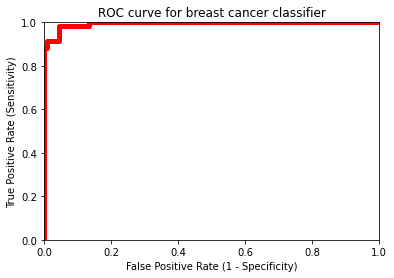

In [24]:
# plot the auc - roc curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [25]:
# roc-auc score
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9944007263922519

### Roc - Auc score should be as closs to 1 for a good model

### deciding the best threshold is the decision that depends on the usecase that we try to solve